In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('bank_customer_churn.csv')

In [4]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,100000,503,Spain,Male,30,1,108701.25,2,1,0,87474.46,0
1,100001,805,Spain,Male,48,4,21125.20,2,0,0,10059.28,0
2,100002,737,France,Female,30,10,89448.34,3,1,0,86066.78,0
3,100003,378,Germany,Female,51,1,10473.40,3,1,1,161905.12,1
4,100004,425,France,Female,21,8,18872.05,3,1,1,58664.02,0


In [7]:
# Check for missing values
df.isnull().sum()

CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# Check for duplicate rows
df.duplicated().sum()

0

In [8]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


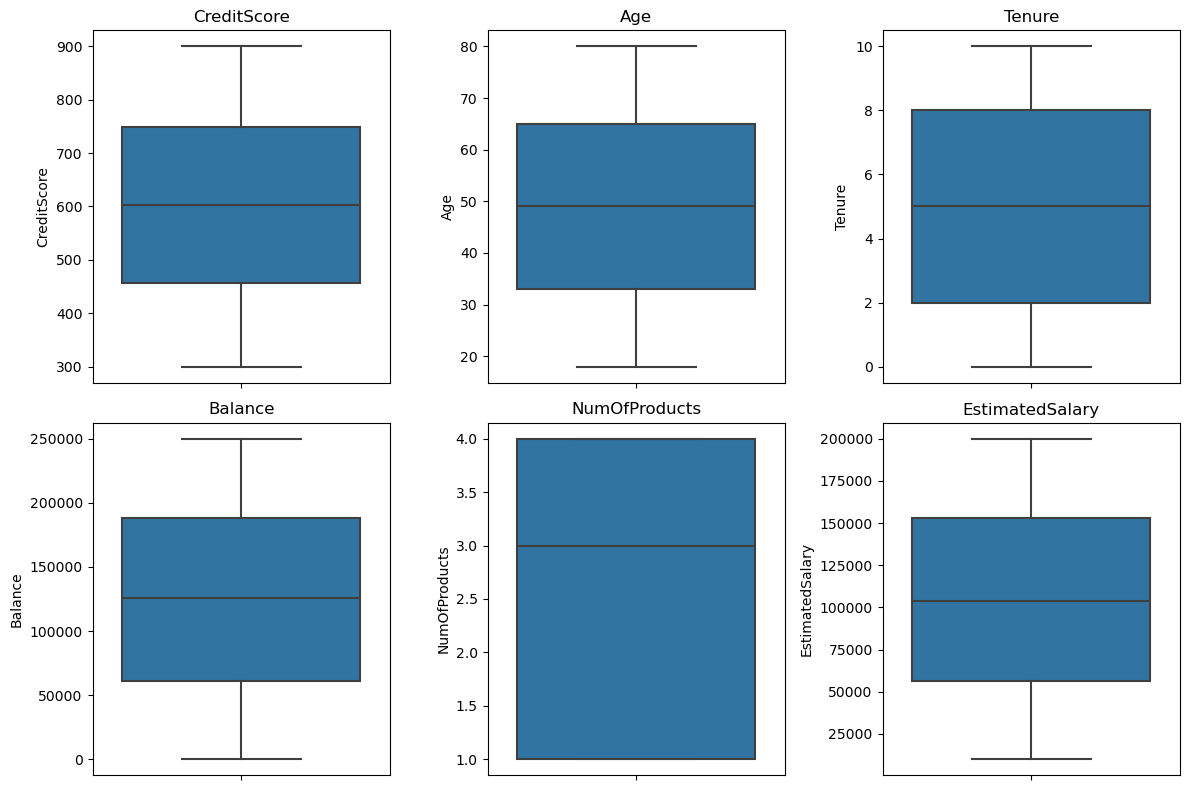

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for numerical columns
numerical_columns = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [18]:
# Using One-hot encode Geography
df = pd.get_dummies(df, columns=["Geography"], drop_first=True)

# Label encode Gender (Male = 1, Female = 0)
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})

# Display first 5 rows after encoding
df.head()


,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,100000,503,1,30,1,108701.25,2,1,0,87474.46,0,False,True
1,100001,805,1,48,4,21125.20,2,0,0,10059.28,0,False,True
2,100002,737,0,30,10,89448.34,3,1,0,86066.78,0,False,False
3,100003,378,0,51,1,10473.40,3,1,1,161905.12,1,True,False
4,100004,425,0,21,8,18872.05,3,1,1,58664.02,0,False,False


In [ ]:
#Split Data into Train & Test Sets

In [22]:
# Define features (X) and target variable (y)
x=df.drop(columns=["Exited"])   # Features (all columns except 'Exited')
y=df["Exited"]   # Target variable (churn label)

In [25]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=42,stratify=y)

In [33]:
from sklearn.preprocessing import StandardScaler
#initalize the scale
scaler=StandardScaler()

In [38]:
# Define the numerical columns to scale
numerical_columns = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]

# Fit the scaler on training data & transform both train & test sets
x_train[numerical_columns]=scaler.fit_transform(x_train[numerical_columns])
x_test[numerical_columns]=scaler.fit_transform(x_test[numerical_columns])

x_train.head()


,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
4826,104826,-0.194636,1,-0.827537,-0.933239,0.035227,-1.349743,0,0,-1.579743,True,False
9594,109594,-0.548302,0,-0.496183,-0.618088,0.468683,-1.349743,0,0,1.287697,True,False
1980,101980,0.640248,1,0.442655,-0.618088,-1.510656,-0.456169,0,0,-0.131000,True,False
2486,102486,0.535887,0,1.271042,-1.563539,0.454598,1.330978,1,0,0.218327,True,False
7149,107149,1.330187,0,0.939687,-1.563539,-0.422478,0.437404,0,1,1.399192,False,True


In [ ]:
#Training a Machine Learning Model

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
# Initialize and train the model
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [44]:
# Make predictions on the test set
y_pred=model.predict(x_test)

model.score(x_test,y_test)

0.751

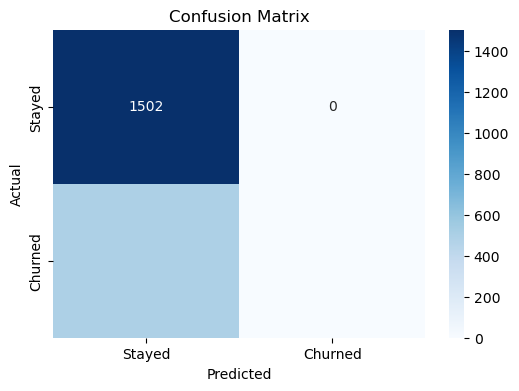

In [46]:
#Confusion_Matrix (To See Correct vs. Incorrect Predictions)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Stayed", "Churned"], yticklabels=["Stayed", "Churned"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


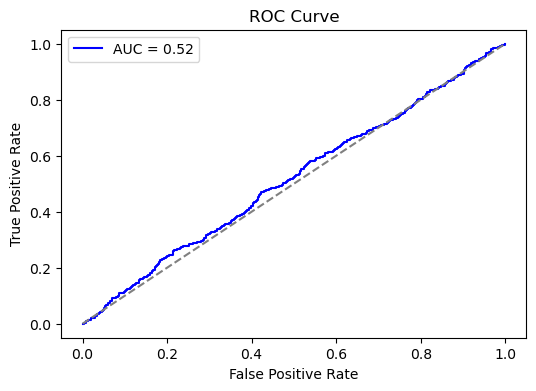

In [48]:
from sklearn.metrics import roc_curve, auc

# Get prediction probabilities
y_probs = model.predict_proba(x_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [ ]:
#let's train a Random Forest Classifier, which handles non-linearity and feature interactions better.

In [51]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(x_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(x_test)

# Calculate new AUC
from sklearn.metrics import roc_auc_score
auc_rf = roc_auc_score(y_test, rf_model.predict_proba(x_test)[:, 1])

print("Random Forest AUC:", auc_rf)


Random Forest AUC: 0.6368657051641987


In [ ]:
#lets visualize Boxplots for Churn Analysis

In [ ]:
# churned (Exited = 1) and non-churned (Exited = 0) customers.
#Boxplot for Credit Score & Churn

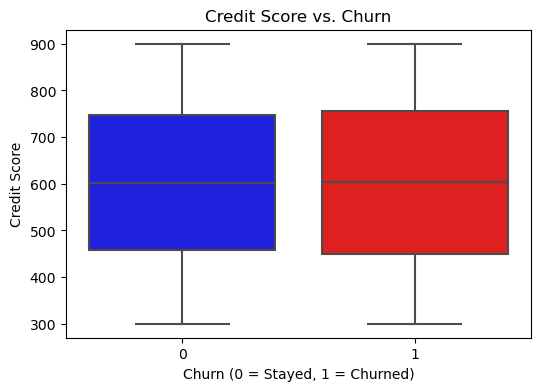

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Exited"], y=df["CreditScore"], palette=["blue", "red"])
plt.xlabel("Churn (0 = Stayed, 1 = Churned)")
plt.ylabel("Credit Score")
plt.title("Credit Score vs. Churn")
plt.show()


The median Credit Score of churned and non-churned customers looks similar.

some churned customers have very low Credit Scores (outliers).

Credit Score alone may not be a strong predictor of churn.

However, customers with very low Credit Scores might be at a slightly higher risk of leaving.


In [ ]:
#Boxplot for Age & Churn

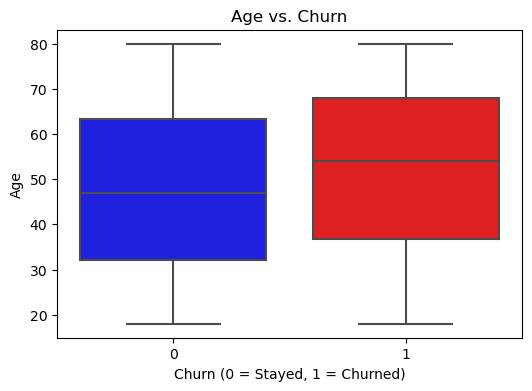

In [56]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Exited"], y=df["Age"], palette=["blue", "red"])
plt.xlabel("Churn (0 = Stayed, 1 = Churned)")
plt.ylabel("Age")
plt.title("Age vs. Churn")
plt.show()


The median Age of churned customers is higher than those who stayed.

There are more older customers in the churned category.

Young customers (20s and early 30s) tend to stay.

Older customers are more likely to churn.

The bank should focus on retaining older customers by offering better benefits or personalized services.

In [ ]:
#Boxplot for Balance & Churn

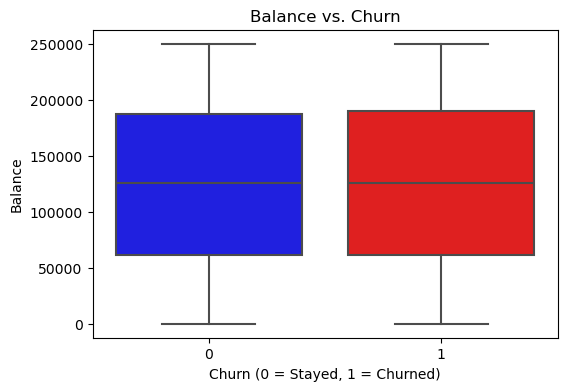

In [57]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Exited"], y=df["Balance"], palette=["blue", "red"])
plt.xlabel("Churn (0 = Stayed, 1 = Churned)")
plt.ylabel("Balance")
plt.title("Balance vs. Churn")
plt.show()


Many churned customers have higher account balances.

Customers with 0 balance mostly stayed.

A few extreme outliers with very high balances churned.

Customers with high balances may leave due to better offers from competitors.

The bank should target high-balance customers with loyalty programs to reduce churn.

 Final Takeaways:
1)Age is a strong indicator – older customers tend to churn more.
2)High-balance customers are at risk – they might leave for better deals.
3)Credit Score alone isn't a major factor, but very low scores might increase churn probability.
